# CASE STUDY - ANALYSING A BOND

Case study for Hyderabad Conference December 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils import *
from financepy.products.bonds.FinBond import *

####################################################################
# FINANCEPY BETA Version 0.186 - This build:  01 Dec 2020 at 13:21 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



# Define the Bond

In [3]:
issueDate = FinDate(15, 5, 2020)

In [4]:
maturityDate = FinDate(15, 5, 2030)

In [5]:
coupon = 0.050 # This means 5%

In [6]:
freqType = FinFrequencyTypes.ANNUAL

In [7]:
accrualType = FinDayCountTypes.ACT_ACT_ICMA

In [8]:
faceAmount = ONE_MILLION

In [9]:
bond = FinBond(issueDate, maturityDate, coupon, freqType, accrualType, faceAmount)

You can get information about the bond using the print method.

In [10]:
print(bond)

OBJECT TYPE: FinBond
ISSUE DATE: 15-MAY-2020
MATURITY DATE: 15-MAY-2030
COUPON: 0.05
FREQUENCY: FinFrequencyTypes.ANNUAL
ACCRUAL TYPE: FinDayCountTypes.ACT_ACT_ICMA
FACE AMOUNT: 1000000


## Bond Cash Flows

We first need to set the settlement date of the bond. 

In [11]:
settlementDate = FinDate(6, 12, 2020)

In [12]:
bond.printFlows(settlementDate)

 15-MAY-2021      50000.00 
 15-MAY-2022      50000.00 
 15-MAY-2023      50000.00 
 15-MAY-2024      50000.00 
 15-MAY-2025      50000.00 
 15-MAY-2026      50000.00 
 15-MAY-2027      50000.00 
 15-MAY-2028      50000.00 
 15-MAY-2029      50000.00 
 15-MAY-2030    1050000.00 


The convention is to use these dates for yield calculations even if some fall on weekends.

## Bond Yield Measures

In [13]:
cleanPrice = 102.20

Yield to maturity using different conventions

In [14]:
for ytmCalcType in FinYTMCalcType:
    y = bond.yieldToMaturity(settlementDate, cleanPrice, ytmCalcType)
    print("%30s %12.7f" % (ytmCalcType, y*100))

         FinYTMCalcType.UK_DMO    4.7022358
      FinYTMCalcType.US_STREET    4.7022358
    FinYTMCalcType.US_TREASURY    4.6986405


## Vectorizations

Some bond function such as yield to maturity support vectorisation

In [15]:
cleanPrices = np.linspace(70,150,20)

In [16]:
ylds = bond.yieldToMaturity(settlementDate, cleanPrices, FinYTMCalcType.US_TREASURY)

Text(0, 0.5, 'Clean Prices')

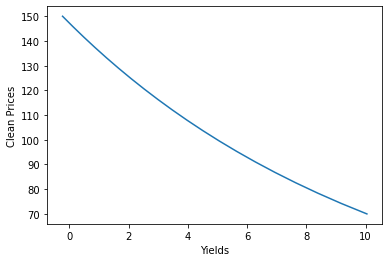

In [17]:
plt.plot(ylds*100.0, cleanPrices)
plt.xlabel("Yields")
plt.ylabel("Clean Prices")

In [18]:
cleanPrices = bond.cleanPriceFromYTM(settlementDate, ylds, FinYTMCalcType.US_TREASURY)

And so we recover the initial input clean prices.

## Accrued Interest

For consistency let's fix the yield calculation convention to be US Treasury

In [19]:
yieldConvention = FinYTMCalcType.US_TREASURY

In [20]:
ytm = bond.yieldToMaturity(settlementDate, cleanPrice, yieldConvention)

Full price is the clean price plus accrued interest

In [21]:
print("Full Price = %12.7f" % bond.fullPriceFromYTM(settlementDate, ytm, yieldConvention))

Full Price =  105.0082192


In [22]:
print("Clean Price = %12.7f" % bond.cleanPriceFromYTM(settlementDate, ytm, yieldConvention))

Clean Price =  102.2000000


Accrued interest is accrued from previous coupon date to settlement date

In [23]:
print("Previous coupon date is ", bond._pcd)

Previous coupon date is  15-MAY-2020


In [24]:
print("Settlement date is ", settlementDate)

Settlement date is  06-DEC-2020


The amount of accrued interest is 

In [25]:
print("Accrued = %12.2f" % bond._accruedInterest)

Accrued =     28082.19


This is based on the following number of days of accrual

In [26]:
print("Accrued Days = %d" % bond._accruedDays)

Accrued Days = 205


In [27]:
print("Principal = %12.2f" % bond.principal(settlementDate, ytm, yieldConvention))

Principal =   1022000.00


## Bond Risk Measures

The bond dollar duration is the actual derivative with respect to the yield. It is the bond price change for a 1bp drop in the yield-to-maturity divided by 1bp.

In [28]:
duration = bond.dollarDuration(settlementDate, ytm, yieldConvention)
print("Dollar Duration = ", duration)

Dollar Duration =  760.5206740968384


Modified Duration divides the dollar duration by the full price of the bond

In [29]:
modifiedDuration = bond.modifiedDuration(settlementDate, ytm, yieldConvention)
print("Modified Duration = ", modifiedDuration)

Modified Duration =  7.2424871124333405


Macauley Duration multiplies the dollar duration by (1+y/f) and divides by the full price

In [30]:
macauleyDuration = bond.macauleyDuration(settlementDate, ytm, yieldConvention)
print("Macauley Duration = ", macauleyDuration)

Macauley Duration =  7.582785541921101


Convexity is the second derivative of the bond price with respect to the yield-to-maturity

In [31]:
conv = bond.convexityFromYTM(settlementDate, ytm, yieldConvention)
print("Convexity = ", conv)

Convexity =  0.6712290253904447


Copyright (c) 2020 Dominic O'Kane